# Exercise: Empirical Line Atmospheric Correction

David R. Thompson, Jet Propulsion Laboratory, California Institute of Technology<br>
Contact: david.r.thompson@jpl.nasa.gov
__________

This exercise demonstrates atmospheric correction using local lineaar models and ground truth data.  We consider four locations with paired remote radiances and in-situ reflectances that were acquired over the Jet Propulsion Laboratory in Pasadena, California.  The four surfaces are:

1. The Mars Yard, an outdoor area covered in bare soil 
2. The roof of Building #306, a laboroatory 
3. A dark, fresh asphalt surface
4. An older, brighter asphalt surface

We will use the first three to fit a linear model relating radiance to reflectance, and then use that to correct the fourth surface.  The image below shows the locations of these surfaces on the laboratory campus.

<img src="data/JPL.png" width=600 />


We first import dependencies and load the data.

In [1]:
import numpy as np
import pylab as plt
import figure_style
import os.path
from scipy.interpolate import interp1d

# Load the in situ reflectance data - first column is the wavelength calibration
wavelengths_insitu, reflectance_marsyard = np.loadtxt(os.path.join('data','20140814_mars_rfl.txt')).T
wavelengths_insitu, reflectance_306roof = np.loadtxt(os.path.join('data','20140814_306_rfl.txt')).T
wavelengths_insitu, reflectance_darklot = np.loadtxt(os.path.join('data','20140814_dark_rfl.txt')).T
wavelengths_insitu, reflectance_oldlot = np.loadtxt(os.path.join('data','20140814_177_rfl.txt')).T

# Load the remote radiance data 
wavelengths, radiance_marsyard = np.loadtxt(os.path.join('data','ang20140612t215342_mars_rdn.txt')).T
wavelengths, radiance_306roof = np.loadtxt(os.path.join('data','ang20140612t215342_306_rdn.txt')).T
wavelengths, radiance_darklot = np.loadtxt(os.path.join('data','ang20140612t215342_dark_rdn.txt')).T
wavelengths, radiance_oldlot = np.loadtxt(os.path.join('data','ang20140612t215342_177_rdn.txt')).T

Let's plot the reflectances.

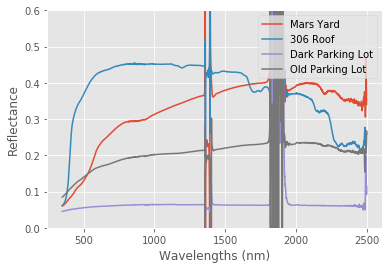

In [2]:
plt.plot(wavelengths_insitu, reflectance_marsyard)
plt.plot(wavelengths_insitu, reflectance_306roof)
plt.plot(wavelengths_insitu, reflectance_darklot)
plt.plot(wavelengths_insitu, reflectance_oldlot)
plt.legend(('Mars Yard','306 Roof','Dark Parking Lot','Old Parking Lot'))
plt.ylim([0,0.6])
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Reflectance');

Now the radiances.

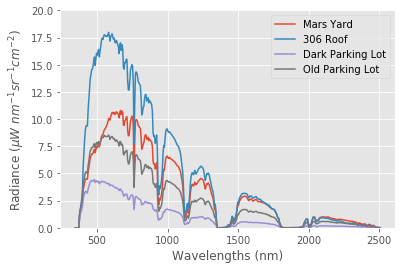

In [3]:
plt.plot(wavelengths, radiance_marsyard)
plt.plot(wavelengths, radiance_306roof)
plt.plot(wavelengths, radiance_darklot)
plt.plot(wavelengths, radiance_oldlot)
plt.legend(('Mars Yard','306 Roof','Dark Parking Lot','Old Parking Lot'))
plt.ylim([0,20])
plt.xlabel('Wavelengths (nm)')
plt.ylabel(r'Radiance ($\mu{W}~nm^{-1} sr^{-1} cm^{-2}$)');

We must resample the in-situ reflectances to match the remote reflectances.  Since the spectral resolution of the remote instrument is finer than the festures, let's use a simple linear interpolation with scipy's interp1d function.

In [4]:
reflectance_marsyard = interp1d(wavelengths_insitu, reflectance_marsyard, 
                                bounds_error=False, fill_value='extrapolate')(wavelengths)
reflectance_306roof = interp1d(wavelengths_insitu, reflectance_306roof, 
                                bounds_error=False, fill_value='extrapolate')(wavelengths)
reflectance_darklot = interp1d(wavelengths_insitu, reflectance_darklot, 
                                bounds_error=False, fill_value='extrapolate')(wavelengths)
reflectance_oldlot = interp1d(wavelengths_insitu, reflectance_oldlot, 
                                bounds_error=False, fill_value='extrapolate')(wavelengths)

Now, for each wavelength, we fit a linear model using the first three spectra.  We use exception catching to exclude some zeroed-out radiance channels.

In [5]:
nwave = len(wavelengths)
predicted_reflectance = np.zeros(nwave)

for i in range(nwave):
    try:
        reflectances = [reflectance_marsyard[i], 
                        reflectance_306roof[i],
                        reflectance_darklot[i]]
        radiances = [radiance_marsyard[i], 
                        radiance_306roof[i],
                        radiance_darklot[i]]
        a, b = np.polyfit(radiances, reflectances, 1)

        predicted_reflectance[i] = a * radiance_oldlot[i] + b
    except:
        continue

/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:630: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


Now we can plot the predicted reflectance, and see how it compares with the actual reflectance measured in situ.

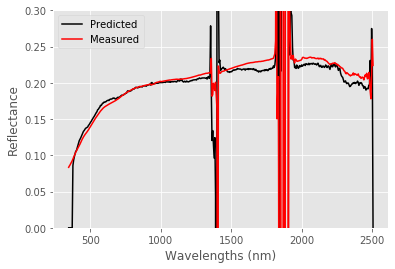

In [6]:
plt.plot(wavelengths, predicted_reflectance,'k')
plt.plot(wavelengths, reflectance_oldlot,'r')
plt.ylim([0,0.3]);
plt.legend(['Predicted','Measured'])
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Reflectance');

<b> Question 1: </b> What factors might contribute to the discrepancies between the prediction and the measurment at the surface?

<b> Question 2: </b> Try fitting models using different combinations of two and three locations. Which measurements are the most consistent?  What uncertainties in the ground measurements might contribute to the differences?

-------------
<b>Acknowledgements</b>: A portion of this research was performed at the Jet Propulsion Laboratory, California Institute of Technology. We acknowledge the support of a PRISM AITT grant from the National Aeronautics and Space Administration (NASA) Earth Science Technology Office. We acknowledge the support of the JPL and Caltech Presidents’ and Directors’ Fund Program. We thank other supporting sponsors including the NASA Earth Science Division for the HyspIRI preparatory campaign, the AVIRIS-NG instrument and the data analysis program “Utilization of Airborne Visible/Infrared Imaging Spectrometer Next Generation Data from an Airborne Campaign in India” NNH16ZDA001N-AVRSNG, for its support of the algorithm development; the Jet Propulsion Laboratory Research and Technology Development Program; and the NASA Center Innovation Fund managed in conjunction with the Jet Propulsion Laboratory Office of the Chief Scientist and Technologist. Copyright 2019 California Institute of Technology. US Government Support Acknowledged.